# Detecting Mental Clues Remotely

## Using machine learning models to predict mental changes and conducting SHAP analysis for explainable machine learning

In [2]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.constant_variable import *
from researchtoolbox.ml import parameter_optimization as op
from researchtoolbox.ml import dataset as dt
from researchtoolbox.ml import cross_validation as cv
from researchtoolbox.ml import supervised_learning as svl


In [3]:
# 需要決定的參數
step = [11, 21]  # 只想比较步骤11和21的二分类预测结果
method_list = ["rf", "svm"]  # 比较rf和svm的分类结果
mode = "rPPG"  # 使用的数据是rPPG

source_folder_path = '../resource/video/video_source/'
target_folder_path = '../result/remote_ppg/'


Using 405 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/46 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

	avg accuracy: 0.713816425120773
	avg f1: 0.5473724284164423



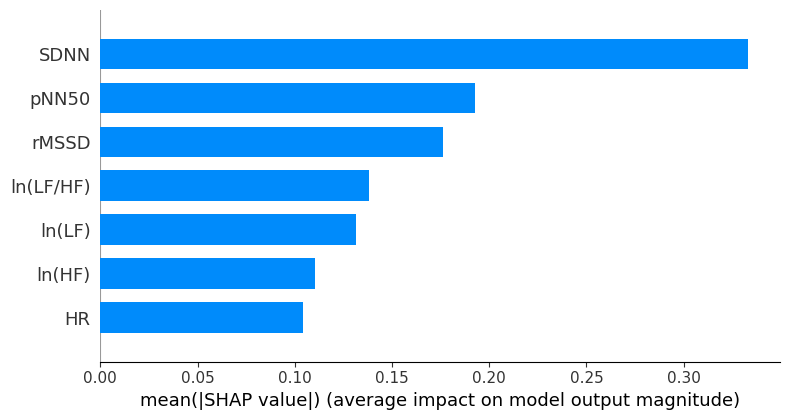

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


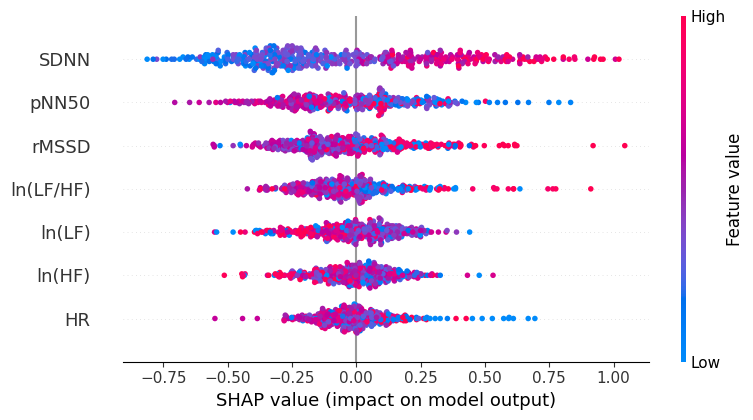

Using 405 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/46 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

Using 406 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/45 [00:00<?, ?it/s]

	avg accuracy: 0.7071014492753624
	avg f1: 0.43697619320095893



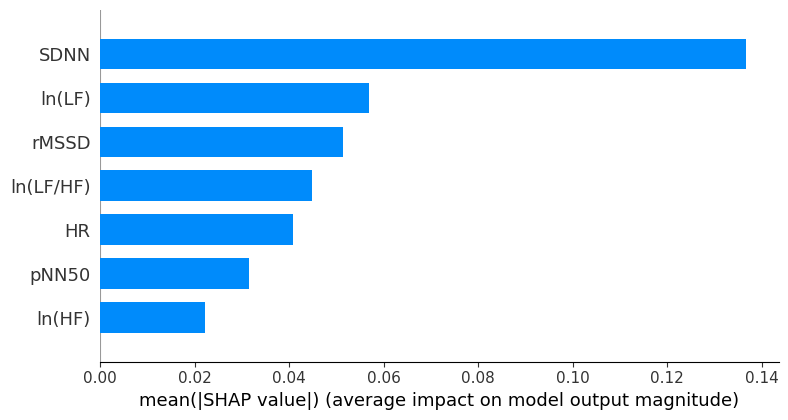

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


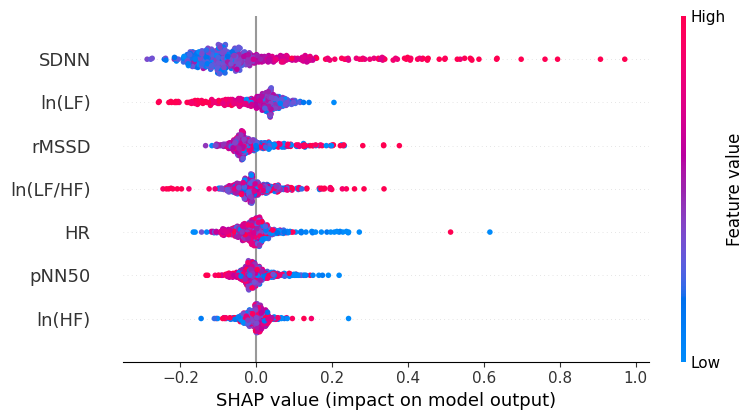

In [3]:
result = {"total_accuracy": [], "total_F1": []}

for method in method_list:
    input_file_path = os.path.join(target_folder_path, "bpm_output","summary","result_updated.csv")
    output_file_path = os.path.join(target_folder_path, "bpm_output","summary", "{}_{}_{}_results.csv".format(mode, method, "vs".join(list(map(str, step)))))
    # save_path_bar = os.path.join(target_folder_path, "bpm_output","summary", "SHAP_plot_{}_{}_{}_results.png".format(mode, method, "vs".join(list(map(str, step)))))
    # save_path_dot = os.path.join(target_folder_path, "bpm_output","summary", "SHAP_{}_{}_{}_results.png".format(mode, method, "vs".join(list(map(str, step)))))

    param_dict = {
        "input_file_path": input_file_path,
        "output_file_path": output_file_path,
        # "save_path_bar": save_path_bar,
        # "save_path_dot": save_path_dot,
        "model": method,
        "features": hrv_variable_list,
        # "add_principal_component_analysis": False,
        # "n_principal_component_list": [int(x) for x in np.linspace(3, 15, num=13)],
        "parameter_grid_search": False,
        "select_important_feature": False,
        "n_parameter_grid_search_iteration": 100,
        "repeat_times": 1,
        "parameter_search_fold": 5,
        "n_fold": 10,
    }

    # 读取并标准化数据，初始化模型
    x_read, y_read, remember_no = dt.Dataset().read_dataset(param_dict["features"], input_file_path, step=step)
    model_random = op.AutoOptimize().model_preparation(method)
    scaler = StandardScaler()

    x_read_scaled = scaler.fit_transform(x_read)
    x_read_scaled = pd.DataFrame(data=x_read_scaled)


    # 初始化交叉验证和模型参数
    cross_validation_settings = cv.cross_validation_setting_model(n_fold = 10,
                                                                  repeat_times = 1,
                                                                  add_principal_component_analysis = False,  # 为false表示不做主成分分析
                                                                  principal_component_ratio = 0.85)  # 根据 累计解释方差比率 决定主成分个数，此处阈值设定为0.85

    data_model_settings = svl.supervised_learning_data_model(x = x_read_scaled,
                                                             Y = y_read,
                                                             remember_no = remember_no)

    
    # 模型训练
    acc, f1 = cv.cross_validation(param_dict).do_cross_validation(cross_validation_settings, data_model_settings, model_random)

    result["total_accuracy"].append(acc)
    result["total_F1"].append(f1)



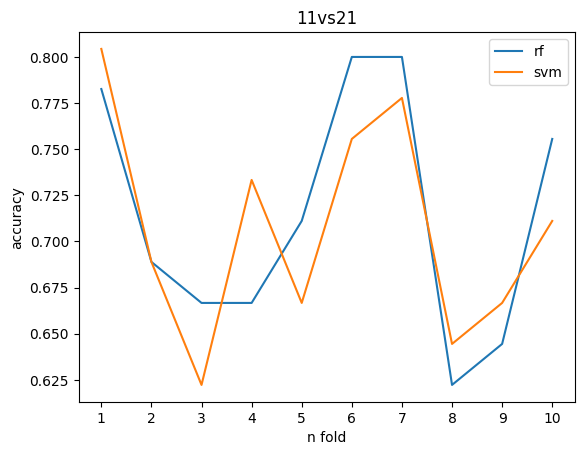

In [4]:
import matplotlib.pyplot as plt

x = [i for i in range(1, len(result["total_accuracy"][0])+1)]

for ind, method in enumerate(method_list):
    plt.plot(x, result["total_accuracy"][ind], label = method)

plt.xticks(x)
plt.legend(method_list)
plt.xlabel("n fold")
plt.ylabel("accuracy")
plt.title("vs".join(list(map(str, step))))
plt.show()

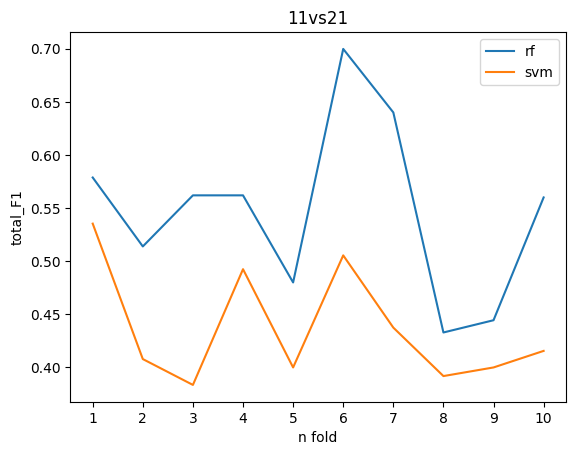

In [5]:
import matplotlib.pyplot as plt

x = [i for i in range(1, len(result["total_F1"][0])+1)]

for ind, method in enumerate(method_list):
    plt.plot(x, result["total_F1"][ind], label = method)

plt.xticks(x)
plt.legend(method_list)
plt.xlabel("n fold")
plt.ylabel("total_F1")
plt.title("vs".join(list(map(str, step))))
plt.show()